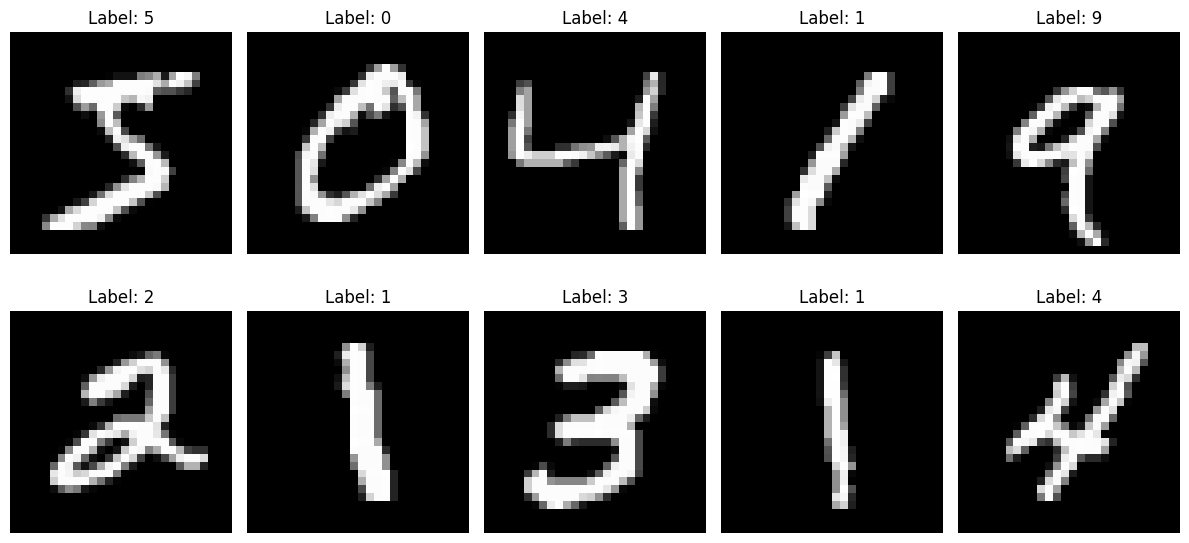

In [3]:
import torchvision.datasets as datasets
import torchvision.transforms as transforms # to convert to numpy array
import matplotlib.pyplot as plt
import unittest
import numpy as np



transform = transforms.Compose([
    transforms.ToTensor()
])

# Load the MNIST dataset
train_set = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_set = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# Extract the data and labels from the datasets
X_train, y_train = train_set.data.numpy(), train_set.targets.numpy()
X_test, y_test = test_set.data.numpy(), test_set.targets.numpy()

# Reshape the data to be of size [N x 784]
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

# Normalize the data to be between 0 and 1
X_train = X_train / 255.0
X_test = X_test / 255.0

X_train.shape, X_test.shape, y_train.shape, y_test.shape

# Anzeigen der ersten 10 Bilder mit Matplotlib
# Anzeigen der ersten 10 Bilder mit Matplotlib
plt.figure(figsize=(12, 6))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_train[i].reshape(28, 28), cmap='gray')  # Hier wird X_train verwendet, um die Bilder anzuzeigen
    plt.title(f"Label: {y_train[i]}")  # Hier wird y_train verwendet, um die entsprechenden Labels anzuzeigen
    plt.axis('off')
plt.tight_layout()
plt.show()


#%%


In [5]:
print("Die Größe des Trainingsdatensatzes beträgt:",  X_train.shape[0])

print("Die Größe des Testsdatensatzes beträgt:", X_test.shape[0])

Die Größe des Trainingsdatensatzes beträgt: 60000
Die Größe des Testsdatensatzes beträgt: 10000


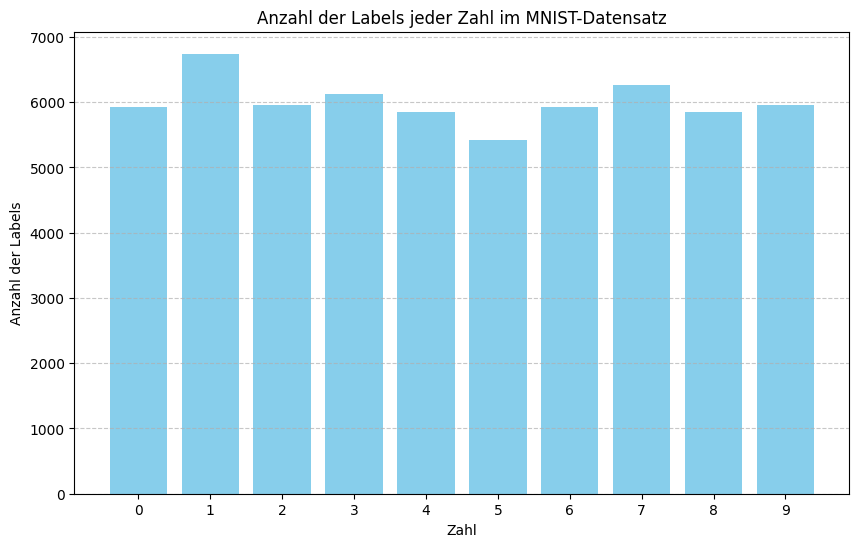

In [6]:
class_counts = {i: 0 for i in range(10)}
for img, label in train_set:
    class_counts[label] += 1

digits = list(class_counts.keys())
counts = list(class_counts.values())

plt.figure(figsize=(10, 6))
plt.bar(digits, counts, color='skyblue')
plt.xlabel('Zahl')
plt.ylabel('Anzahl der Labels')
plt.title('Anzahl der Labels jeder Zahl im MNIST-Datensatz')
plt.xticks(digits)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [7]:
for digit in range(10):
    train_count = np.sum(y_train == digit)
    test_count = np.sum(y_test == digit)
    print(f"Class {digit}: {train_count} train examples, {test_count} test examples")


Class 0: 5923 train examples, 980 test examples
Class 1: 6742 train examples, 1135 test examples
Class 2: 5958 train examples, 1032 test examples
Class 3: 6131 train examples, 1010 test examples
Class 4: 5842 train examples, 982 test examples
Class 5: 5421 train examples, 892 test examples
Class 6: 5918 train examples, 958 test examples
Class 7: 6265 train examples, 1028 test examples
Class 8: 5851 train examples, 974 test examples
Class 9: 5949 train examples, 1009 test examples


Aufgbae 2

In [8]:


class LinearLayer:
    def __init__(self, input_size, output_size, activation_fn=None, activation_fn_grad=None):
        """
        Initialize LinearLayer with given input_size, output_size, and activation functions.

        :param input_size: number of input neurons
        :param output_size: number of output neurons
        :param activation_fn: activation function (default: None)
        :param activation_fn_grad: gradient of the activation function (default: None)
        """
        self.x = None  # input to the layer
        self.bias_grad = None  # gradient of the bias
        self.weights_grad = None  # gradient of the weights

        self.input_size = input_size
        self.output_size = output_size
        self.activation_fn = activation_fn
        self.activation_fn_grad = activation_fn_grad
        self.weights = np.random.randn(input_size, output_size) * 0.01  # initialize weights with small random values
        self.bias = np.zeros((1, output_size))  # initialize bias with zeros

    def forward(self, x):
        """
        Perform forward pass of the layer.

        :param x: input to the layer
        :return: output of the layer
        """
        self.x = x
        linear_output = np.dot(x, self.weights) + self.bias  # compute linear output of the layer
        
        if self.activation_fn is None:
            return linear_output
        
        return self.activation_fn(linear_output)  # apply activation function to the linear output

    def backward(self, grad_output, hidden_output=None):
        """
        Perform backward pass of the layer.

        :param grad_output: gradient of the output of the layer
        :param hidden_output: output of the layer before activation (default: None)
        :return: gradient of the input to the layer
        """
        if self.activation_fn_grad is not None:
            if hidden_output is not None:
                grad_output = self.activation_fn_grad(hidden_output) * grad_output  # apply chain rule
            else:
                grad_output = self.activation_fn_grad(grad_output) * grad_output  # apply chain rule
        
        self.weights_grad = np.dot(self.x.T, grad_output)  # compute gradient of the weights
        self.bias_grad = np.sum(grad_output, axis=0, keepdims=True)  # compute gradient of the bias
        return np.dot(grad_output, self.weights.T)  # compute gradient of the input to the layer

    def update(self, lr):
        """
        Update the weights and bias of the layer using gradient descent.

        :param lr: learning rate
        """
        self.weights -= lr * self.weights_grad  # update weights
        self.bias -= lr * self.bias_grad  # update bias


In [9]:
class TestLinearLayer(unittest.TestCase):
    def setUp(self):
        self.input_size = 10
        self.output_size = 5
        self.linear_layer = LinearLayer(self.input_size, self.output_size, None, None)

    def test_forward(self):
        x = np.random.randn(10, self.input_size) # 10 samples
        output = self.linear_layer.forward(x)
        self.assertEqual(output.shape, (10, self.output_size))

    def test_backward(self):
        x = np.random.randn(10, self.input_size) # 10 samples
        output = self.linear_layer.forward(x)
        grad_output = np.random.randn(10, self.output_size)
        grad_input = self.linear_layer.backward(grad_output)
        self.assertEqual(grad_input.shape, (10, self.input_size))

    def test_update(self):
        self.linear_layer.weights = np.array([[1, 2], [3, 4]], dtype=np.float32)
        self.linear_layer.bias = np.array([[1, 2]], dtype=np.float32)
        self.linear_layer.weights_grad = np.array([[1, 2], [3, 4]], dtype=np.float32)
        self.linear_layer.bias_grad = np.array([[1, 2]], dtype=np.float32)

        self.linear_layer.update(0.1)
        self.assertTrue(np.allclose(self.linear_layer.weights, np.array([[0.9, 1.8], [2.7, 3.6]])))
        self.assertTrue(np.allclose(self.linear_layer.bias, np.array([[0.9, 1.8]])))

    def test_shapes(self):
        x = np.random.randn(1, self.input_size)
        output = self.linear_layer.forward(x)
        grad_output = np.random.randn(1, self.output_size)
        grad_input = self.linear_layer.backward(grad_output)

        self.assertEqual(self.linear_layer.weights_grad.shape, (self.input_size, self.output_size))
        self.assertEqual(self.linear_layer.bias_grad.shape, (1, self.output_size))
    
    def test_numerical_gradient(self):
        def forward_with_weights(w):
            self.linear_layer.weights = w.reshape(self.input_size, self.output_size)
            return self.linear_layer.forward(x)

        def forward_with_bias(b):
            self.linear_layer.bias = b.reshape(1, self.output_size)
            return self.linear_layer.forward(x)

        x = np.random.randn(2, self.input_size)  # 2 samples
        output = self.linear_layer.forward(x)
        grad_output = np.random.randn(2, self.output_size)
        self.linear_layer.backward(grad_output)

        epsilon = 1e-5
        numerical_grad_weights = np.zeros_like(self.linear_layer.weights)
        numerical_grad_bias = np.zeros_like(self.linear_layer.bias)

        # Calculate numerical gradient for weights
        for i in range(self.input_size):
            for j in range(self.output_size):
                original_weight = self.linear_layer.weights[i, j]
                self.linear_layer.weights[i, j] = original_weight + epsilon
                output_plus = forward_with_weights(self.linear_layer.weights)
                self.linear_layer.weights[i, j] = original_weight - epsilon
                output_minus = forward_with_weights(self.linear_layer.weights)
                numerical_grad_weights[i, j] = np.sum((output_plus - output_minus) * grad_output) / (2 * epsilon)
                self.linear_layer.weights[i, j] = original_weight

        # Calculate numerical gradient for bias
        for j in range(self.output_size):
            original_bias = self.linear_layer.bias[0, j]
            self.linear_layer.bias[0, j] = original_bias + epsilon
            output_plus = forward_with_bias(self.linear_layer.bias)
            self.linear_layer.bias[0, j] = original_bias - epsilon
            output_minus = forward_with_bias(self.linear_layer.bias)
            numerical_grad_bias[0, j] = np.sum((output_plus - output_minus) * grad_output) / (2 * epsilon)
            self.linear_layer.bias[0, j] = original_bias

        # Compare analytical and numerical gradients
        self.assertTrue(np.allclose(self.linear_layer.weights_grad, numerical_grad_weights, rtol=1e-4, atol=1e-4))
        self.assertTrue(np.allclose(self.linear_layer.bias_grad, numerical_grad_bias, rtol=1e-4, atol=1e-4))

unittest.main(argv=[''], verbosity=2, exit=False)

test_backward (__main__.TestLinearLayer.test_backward) ... ok
test_forward (__main__.TestLinearLayer.test_forward) ... ok
test_numerical_gradient (__main__.TestLinearLayer.test_numerical_gradient) ... ok
test_shapes (__main__.TestLinearLayer.test_shapes) ... ok
test_update (__main__.TestLinearLayer.test_update) ... ok

----------------------------------------------------------------------
Ran 5 tests in 0.005s

OK


Aufgabe 3

In [46]:
alpha, gamma = .9, 2

def at(y):
    if alpha is None:
        return np.ones_like(y)
    return np.where(y, alpha, 1 - alpha)

def pt(y, p):
    p = np.clip(p, 1e-15, 1 - 1e-15)
    return np.where(y, p, 1 - p)

def focal_loss(y_pred, y_true):
    atv = at(y_true)
    ptv = pt(y_true, y_pred)
    return -atv * (1 - ptv) * gamma * np.log(ptv)

def focal_loss_grad(y_pred, y_true):
    y = 2 * y_true - 1  # {0, 1} -> {-1, 1}
    atv = at(y_true)
    ptv = pt(y_true, y_pred)
    g = gamma
    return atv * y * (1 - ptv) ** g * (g * ptv * np.log(ptv) + ptv - 1)
def relu(x):
    return np.maximum(0, x)

def relu_grad(x):
    return x > 0
def sigmoid(x):
    x = np.clip(x, -500, 500) # clip x to prevent overflow
    return 1 / (1 + np.exp(-x))

def sigmoid_grad(x):
    return sigmoid(x) * (1 - sigmoid(x))
def softmax(x):
    x = x - np.max(x, axis=1, keepdims=True) # prevent overflow
    x = np.exp(x)
    x = x / np.sum(x, axis=1, keepdims=True)
    return x

def softmax_grad(x):
    return softmax(x) * (1 - softmax(x))
def mse(y_pred, y_true):
    batch_size = y_pred.shape[0]
    loss = np.sum((y_pred - y_true)**2) / batch_size
    return loss

def mse_grad(y_pred, y_true):
    batch_size = y_pred.shape[0]
    grad = 2 * (y_pred - y_true) / batch_size
    return grad
def cross_entropy(y_pred, y_true):
    eps = 1e-15
    y_pred = np.clip(y_pred, eps, 1-eps) # clip y_pred to prevent log(0) or log(1)
    loss = -(y_true * np.log(y_pred)).sum(axis=1).mean()
    return loss

def cross_entropy_grad(y_pred, y_true):
    eps = 1e-15
    y_pred = np.clip(y_pred, eps, 1-eps) # clip y_pred to prevent division by 0
    grad = y_pred - y_true
    return grad
def binary_cross_entropy(y_pred, y_true):
    eps = 1e-15
    y_pred = np.clip(y_pred, eps, 1-eps) # clip y_pred to prevent log(0) or log(1)
    return -(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred)).mean()

def binary_cross_entropy_grad(y_pred, y_true):
    eps = 1e-15
    # y_pred = np.clip(y_pred, eps, 1-eps) # clip y_pred to prevent division by 0
    return (y_pred - y_true) / (y_pred * (1 - y_pred) + eps) # add eps to prevent division by 0

In [47]:
def f1_score(y_pred, y_true):
    """
    Compute the F1 score of the predictions.

    :param y_pred: predicted labels
    :param y_true: true labels
    :return: F1 score
    """
    y_true = np.array(y_true).flatten()
    y_pred = np.array(y_pred).flatten()
    assert y_true.shape == y_pred.shape, "y_true and y_pred must have the same shape"

    tp = np.sum((y_true == 1) & (y_pred == 1))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    fn = np.sum((y_true == 1) & (y_pred == 0))

    if tp + fp == 0 or tp + fn == 0:
        return 0

    precision = tp / (tp + fp)
    recall = tp / (tp + fn)

    f1 = 2 * (precision * recall) / (precision + recall)
    return f1

In [49]:
def get_batches(x, y, batch_size):
    """
    Generate batches of data.

    :param x: input data
    :param y: target data
    :param batch_size: size of each batch
    :return: a generator object that yields batches of data
    """
    n_batches = len(x) // batch_size
    
    # shuffle data before creating batches
    idx = np.random.permutation(len(x))
    x = x[idx]
    y = y[idx]

    for i in range(0, n_batches * batch_size, batch_size):
        x_batch = x[i:i+batch_size]
        y_batch = y[i:i+batch_size]
        yield x_batch, y_batch

In [50]:
class NetworkDevelopment:
    """
    Class to manage and visualize the development of a neural network over epochs.

    :param total_epochs: total number of epochs
    """
    def __init__(self, total_epochs):
        self.total_epochs = total_epochs
        self.losses = []
        self.accuracies_train = []
        self.accuracies_test = []

    def add_epoch(self, epoch_number, loss, acc_train, acc_test):
        """
        Add the loss and accuracy for an epoch.

        :param epoch_number: epoch number
        :param loss: loss value
        :param acc_train: accuracy value on training set
        :param acc_test: accuracy value on test set
        :return: a string with information about the epoch
        """
        self.losses.append(loss)
        self.accuracies_train.append(acc_train)
        self.accuracies_test.append(acc_test)

        return f'Epoch {epoch_number}/{self.total_epochs} - loss: {loss:.4f} - acc_train: {acc_train:.4f} - acc_test: {acc_test:.4f}'

    def plot(self):
        """
        Plot the loss and accuracy over epochs.
        """
        epochs = np.arange(1, self.total_epochs + 1)

        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
        ax1.plot(epochs, self.losses)
        ax1.set_title('Loss over Epochs')
        ax1.set_xlabel('Epoch')
        ax1.set_ylabel('Loss')
        ax2.plot(epochs, self.accuracies_train, label='Training')
        ax2.plot(epochs, self.accuracies_test, label='Test')
        ax2.set_title('Accuracy over Epochs')
        ax2.set_xlabel('Epoch')
        ax2.set_ylabel('Accuracy')
        ax2.legend()
        plt.show()

    def summary(self):
        """
        Print a summary of the network's development over epochs.
        """
        self.plot()

        print(f'avg acc change / epoch (Training set): {np.mean(np.diff(self.accuracies_train)):.4f}')
        print(f'avg acc change / epoch (Test set): {np.mean(np.diff(self.accuracies_test)):.4f}')
        print(f'avg loss change / epoch: {np.mean(np.diff(self.losses)):.4f}')

In [70]:
class SingleLayerNetwork:
    def __init__(self, input_size, hidden_size, output_size, loss_fn, loss_fn_grad, acc_fn):
        """
        Initialize the SingleLayerNetwork.

        :param input_size: size of input layer
        :param hidden_size: size of hidden layer
        :param output_size: size of output layer
        :param loss_fn: loss function
        :param loss_fn_grad: gradient of the loss function
        :param acc_fn: accuracy function
        """
        self.loss_fn = loss_fn
        self.loss_fn_grad = loss_fn_grad
        self.acc_fn = acc_fn

        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size

        self.hidden_layer = LinearLayer(input_size, hidden_size, relu, relu_grad)
        self.output_layer = LinearLayer(hidden_size, output_size, sigmoid, sigmoid_grad)

    def forward(self, x):
        """
        Compute the forward pass of the network.

        :param x: input data
        :return: output prediction
        """
        self.x = x
        self.h = self.hidden_layer.forward(x)
        self.y_pred = self.output_layer.forward(self.h)
        return self.y_pred

    def backward(self, y_true):
        """
        Compute the backward pass of the network.

        :param y_true: true target data
        :return: gradient of the output
        """
        y_true = y_true.reshape(-1, 1)
        self.y_pred = self.y_pred.reshape(-1, 1)

        grad_output = self.loss_fn_grad(self.y_pred, y_true)

        grad_output = self.output_layer.backward(grad_output)
        grad_output = self.hidden_layer.backward(grad_output)

        return grad_output

    def update(self, lr):
        """
        Update the weights and biases of the network.

        :param lr: learning rate
        """
        self.hidden_layer.update(lr)
        self.output_layer.update(lr)

    def train(self, X_train, y_train, X_test, y_test, lr, epochs, batch_size, output=True):
        """
        Train the network.

        :param X_train: input data for the training set
        :param y_train: target data for the training set
        :param X_test: input data for the test set
        :param y_test: target data for the test set
        :param lr: learning rate
        :param epochs: number of epochs to train for
        :param batch_size: size of each batch
        :param output: whether or not to print output during training
        """
        self.dev = NetworkDevelopment(total_epochs=epochs)
        
        for epoch in range(epochs):
            loss_list = []
            for x_batch, y_batch in get_batches(X_train, y_train, batch_size):
                y_pred = self.forward(x_batch)

                loss = self.loss_fn(y_pred, y_batch)
                loss_list.append(loss)

                self.backward(y_batch)
                self.update(lr)

            acc_train = self.evaluate(X_train, y_train)
            acc_test = self.evaluate(X_test, y_test)
            avg_loss = np.mean(loss_list)

            epoch_str = self.dev.add_epoch(epoch+1, avg_loss, acc_train, acc_test)
            if output:
                print(epoch_str)

    def predict(self, X):
        """
        Make predictions using the trained network.

        :param X: input data
        :return: predicted outputs
        """
        return (self.forward(X) > .5).astype(int).reshape(-1, 1) # threshold at .5

    def evaluate(self, X, y, acc_fn=None):
        """
        Evaluate the accuracy of the network on a given dataset.

        :param X: input data for the dataset
        :param y: target data for the dataset
        :param acc_fn: (optional) custom accuracy function to use
        :return: accuracy of the network on the dataset
        """
        y_pred = self.predict(X).flatten()

        if acc_fn is not None:
            return acc_fn(y_pred, y)
        
        return self.acc_fn(y_pred, y)

    def summary(self):
        """
        Plot the development of loss and accuracy during training and print a summary of the model's performance.
        """
        self.dev.summary()
y_train_2_binary = (y_train == 4).astype(int)
y_test_2_binary = (y_test == 4).astype(int)


Epoch 1/6 - loss: 0.1233 - acc_train: 0.1677 - acc_test: 0.1679
Epoch 2/6 - loss: 0.1233 - acc_train: 0.4100 - acc_test: 0.4234
Epoch 3/6 - loss: 0.1233 - acc_train: 0.5472 - acc_test: 0.5598
Epoch 4/6 - loss: 0.1233 - acc_train: 0.6038 - acc_test: 0.6040
Epoch 5/6 - loss: 0.1232 - acc_train: 0.6254 - acc_test: 0.6314
Epoch 6/6 - loss: 0.1232 - acc_train: 0.6359 - acc_test: 0.6347


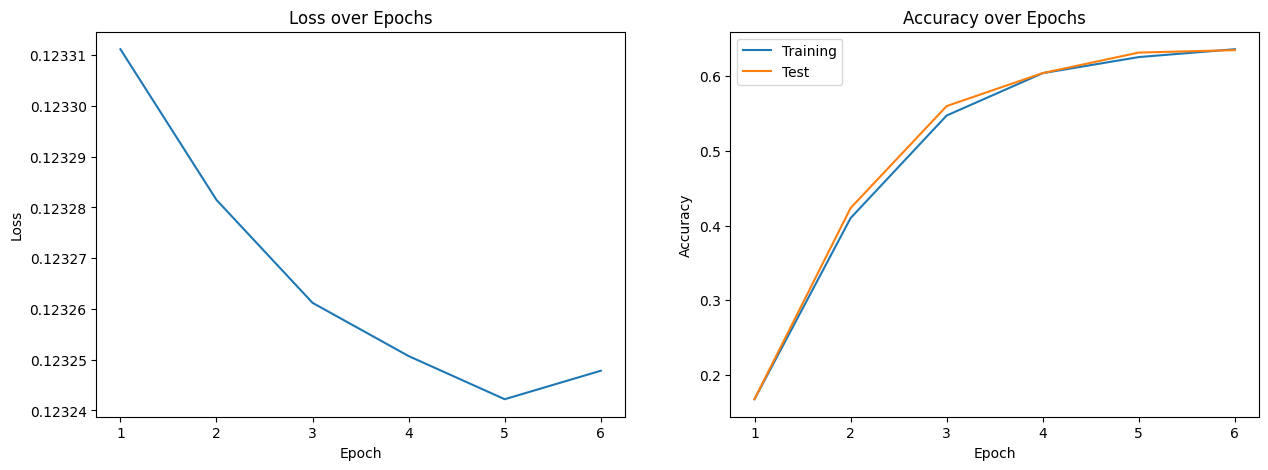

avg acc change / epoch (Training set): 0.0936
avg acc change / epoch (Test set): 0.0934
avg loss change / epoch: -0.0000


0.6346555323590813

In [81]:
slp = SingleLayerNetwork(input_size=784, hidden_size=512, output_size=1, loss_fn=focal_loss, loss_fn_grad=focal_loss_grad, acc_fn=f1_score)
slp.train(X_train, y_train_2_binary, X_test, y_test_2_binary, lr=0.0001, epochs=6, batch_size=32)
slp.summary()
slp.evaluate(X_test, y_test_2_binary)

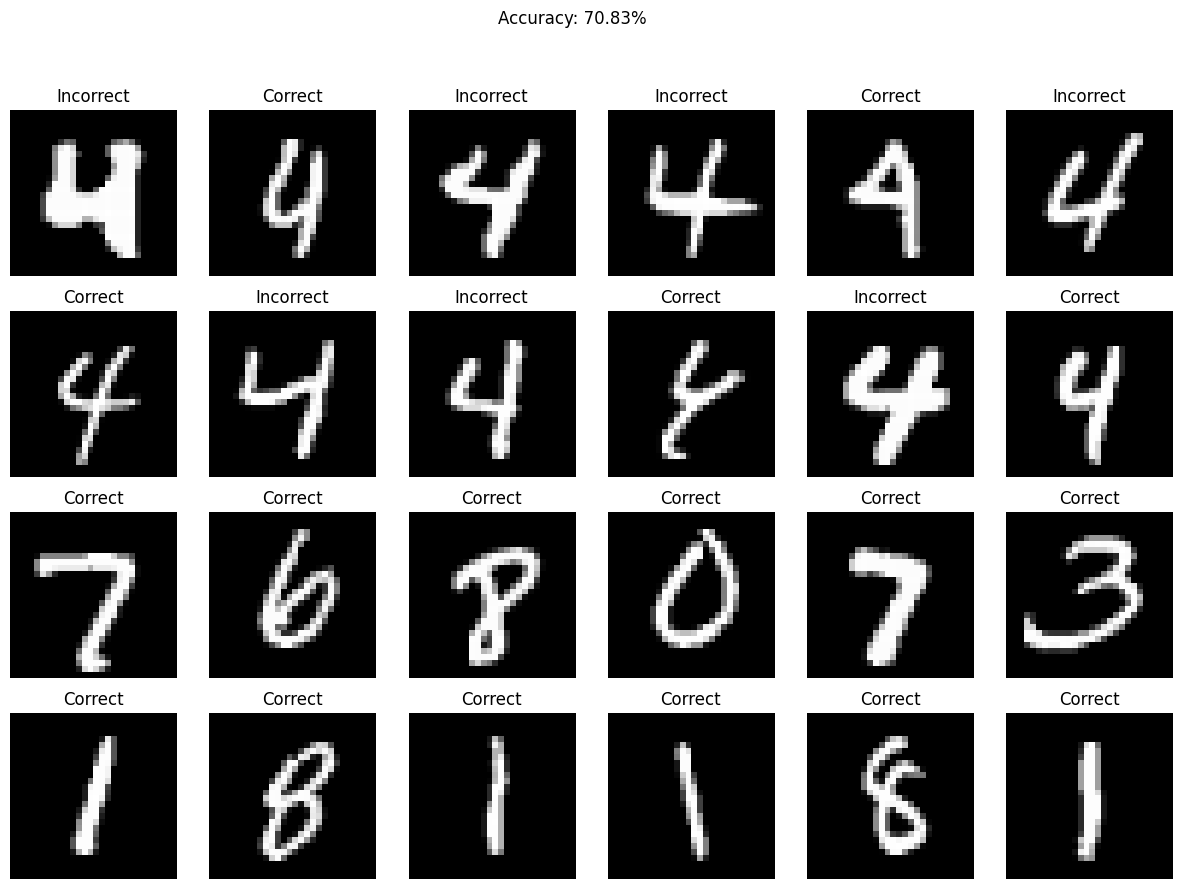

In [96]:
# Wähle 12 Bilder mit der Ziffer 4 und 12 Bilder mit einer anderen Ziffer aus dem Testdatensatz
indices_4 = np.where(y_test == 4)[0]
indices_other = np.where(y_test != 4)[0]

indices_4_selected = np.random.choice(indices_4, 12, replace=False)
indices_other_selected = np.random.choice(indices_other, 12, replace=False)

sample_images_4 = X_test[indices_4_selected]
sample_images_other = X_test[indices_other_selected]

# Kombiniere die ausgewählten Bilder
sample_images = np.concatenate([sample_images_4, sample_images_other], axis=0)
true_labels = np.concatenate([np.ones(12), np.zeros(12)])  # 1 für Ziffer 4, 0 für andere Ziffern

# Mache Vorhersagen für die ausgewählten Bilder
predictions = slp.predict(sample_images).flatten()

# Überprüfe, ob die Vorhersagen korrekt sind
correct_predictions = ((predictions == 1) & (true_labels == 4)) | ((predictions == 0) & (true_labels != 4))

# Berechne den Prozentsatz der korrekten Vorhersagen
accuracy = np.mean(correct_predictions) * 100

# Zeige die Bilder und Vorhersagen an
plt.figure(figsize=(15, 10))
for i in range(24):
    plt.subplot(4, 6, i + 1)
    plt.imshow(sample_images[i].reshape(28, 28), cmap='gray')
    if correct_predictions[i]:
        plt.title('Correct')
    else:
        plt.title('Incorrect')
    plt.axis('off')
plt.suptitle(f'Accuracy: {accuracy:.2f}%')
plt.show()




In [105]:
def get_param_combinations(epochs, batch_sizes, learning_rates, hidden_sizes):
    return [(e, b, l, h) for e in epochs for b in batch_sizes for l in learning_rates for h in hidden_sizes]

epochs = [1000]
batch_sizes = [2]
learning_rates = [1, 0.5, 0.1, 0.01]
hidden_sizes = [4,8,16]

def test_brute_force_single_layer(param_combos, X_train, y_train, X_test, y_test):
    """
    Tests the SingleLayerNetwork model with a brute-force approach by iterating over all parameter combinations and
    evaluating their accuracy.

    :param param_combos: List of parameter combinations to be tested.
    :param X_train: Training data.
    :param y_train: Training labels.
    :param X_test: Test data.
    :param y_test: Test labels.

    :returns: A tuple containing the highest accuracy achieved and the corresponding parameter combination.
    """
    results = []
    best_acc = 0
    best_param_combo = None

    for i in range(len(param_combos)):
        e, b, l, h = param_combos[i]
        try:
            network = SingleLayerNetwork(input_size=784, hidden_size=h, output_size=1, 
                                        loss_fn=focal_loss, loss_fn_grad=focal_loss_grad,
                                        acc_fn=f1_score)

            network.train(X_train, y_train, X_test, y_test, lr=l, epochs=e, batch_size=b, output=False)
            acc = network.evaluate(X_test, y_test)

            results.append((e, b, l, h, acc))
            if acc > best_acc:
                best_acc = acc
                best_param_combo = param_combos[i]

            print(f"combo {i+1}/{len(param_combos)}: - Epochs: {e} - Batch size: {b} - Learning rate: {l} - Hidden size: {h} - Accuracy: {acc:.4f}")
        except Exception as e:
            print(f"Error: {e}")
            continue

    return best_acc, best_param_combo

sl_combos = get_param_combinations(epochs, batch_sizes, learning_rates, hidden_sizes)
print(f"Testing {len(sl_combos)} parameter combinations")

Testing 12 parameter combinations


In [106]:
test_brute_force_single_layer(sl_combos, X_train, y_train_2_binary, X_test, y_test_2_binary)

KeyboardInterrupt: 

In [108]:
def naive_acc(y_pred, y_true):
    return np.mean(y_pred == y_true)
def one_hot_encode(y):
    y_one_hot = np.zeros((len(y), 10))
    y_one_hot[np.arange(len(y)), y] = 1
    return y_one_hot

y_train_one_hot = one_hot_encode(y_train)
y_test_one_hot = one_hot_encode(y_test)

In [109]:
class MultiLayerNetwork:
    def __init__(self, input_size, hidden_size, output_size, loss_fn, loss_fn_grad, acc_fn):
        """
        Initialize the MultiLayerNetwork.
        :param input_size: size of input layer
        :param hidden_size: size of hidden layer
        :param output_size: size of output layer
        :param loss_fn: loss function
        :param loss_fn_grad: gradient of the loss function
        :param acc_fn: accuracy function
        """
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size

        self.loss_fn = loss_fn
        self.loss_fn_grad = loss_fn_grad
        self.acc_fn = acc_fn

        self.hidden_layer1 = LinearLayer(input_size, hidden_size, relu, relu_grad)
        self.hidden_layer2 = LinearLayer(hidden_size, hidden_size, relu, relu_grad)
        self.hidden_layer3 = LinearLayer(hidden_size, hidden_size, relu, relu_grad)
        self.output_layer = LinearLayer(hidden_size, output_size, softmax, softmax_grad)

        self.dev = None
        self.hidden_output1 = None
        self.hidden_output2 = None
        self.hidden_output3 = None
        self.predicted_output = None

    def forward(self, x):
        """
        Compute the forward pass of the network.

        :param x: input data
        :return: output prediction
        """
        self.hidden_output1 = self.hidden_layer1.forward(x)
        self.hidden_output2 = self.hidden_layer2.forward(self.hidden_output1)
        self.hidden_output3 = self.hidden_layer3.forward(self.hidden_output2)
        self.predicted_output = self.output_layer.forward(self.hidden_output3)
        return self.predicted_output

    def backward(self, y_true):
        """
        Compute the backward pass of the network.

        :param y_true: true target data
        :return: gradient of the output
        """
        gradient_output = self.loss_fn_grad(self.predicted_output, y_true)

        gradient_output = self.output_layer.backward(gradient_output, self.predicted_output)
        gradient_output = self.hidden_layer3.backward(gradient_output, self.hidden_output3)
        gradient_output = self.hidden_layer2.backward(gradient_output, self.hidden_output2)
        gradient_output = self.hidden_layer1.backward(gradient_output, self.hidden_output1)

        return gradient_output

    def update(self, learning_rate):
        """
        Update the weights of the network.

        :param learning_rate: learning rate
        """
        self.hidden_layer1.update(learning_rate)
        self.hidden_layer2.update(learning_rate)
        self.hidden_layer3.update(learning_rate)
        self.output_layer.update(learning_rate)

    def train(self, X_train, y_train, X_test, y_test, learning_rate, epochs, batch_size, output=True):
        """
        Train the network.

        :param X_train: training data
        :param y_train: training target data
        :param X_test: test data
        :param y_test: test target data
        :param learning_rate: learning rate
        :param epochs: number of epochs
        :param batch_size: batch size
        :param output: whether to print the results
        """
        self.dev = NetworkDevelopment(total_epochs=epochs)

        for epoch in range(epochs):
            loss_list = []
            for X_batch, y_batch in get_batches(X_train, y_train, batch_size):
                predicted_output = self.forward(X_batch)

                loss = self.loss_fn(predicted_output, y_batch)
                loss_list.append(loss)

                self.backward(y_batch)
                self.update(learning_rate)

            avg_loss = np.mean(loss_list)
            acc_train = self.evaluate(X_train, y_train)
            acc_test = self.evaluate(X_test, y_test)

            epoch_str = self.dev.add_epoch(epoch+1, avg_loss, acc_train, acc_test)
            if output:
                print(epoch_str)

    def predict(self, X):
        """
        Predict the output of the network.

        :param X: input data
        :return: predicted output
        """
        predicted_output = self.forward(X)
        return np.argmax(predicted_output, axis=1)

    def evaluate(self, X, y):
        """
        Evaluate the network.

        :param X: input data
        :param y: target data
        :return: accuracy
        """
        predicted_classes = self.predict(X)
        true_classes = np.argmax(y, axis=1)
        return self.acc_fn(predicted_classes, true_classes)

    def summary(self):
        """
        Print a summary of the network development.
        """
        self.dev.summary()
        

Epoch 1/10 - loss: 2.3011 - acc_train: 0.1124 - acc_test: 0.1135
Epoch 2/10 - loss: 1.9408 - acc_train: 0.7262 - acc_test: 0.7374
Epoch 3/10 - loss: 0.4910 - acc_train: 0.9100 - acc_test: 0.9059
Epoch 4/10 - loss: 0.2431 - acc_train: 0.9497 - acc_test: 0.9432
Epoch 5/10 - loss: 0.1711 - acc_train: 0.9647 - acc_test: 0.9565
Epoch 6/10 - loss: 0.1346 - acc_train: 0.9695 - acc_test: 0.9591
Epoch 7/10 - loss: 0.1090 - acc_train: 0.9759 - acc_test: 0.9647
Epoch 8/10 - loss: 0.0923 - acc_train: 0.9787 - acc_test: 0.9636
Epoch 9/10 - loss: 0.0775 - acc_train: 0.9829 - acc_test: 0.9685
Epoch 10/10 - loss: 0.0685 - acc_train: 0.9786 - acc_test: 0.9626


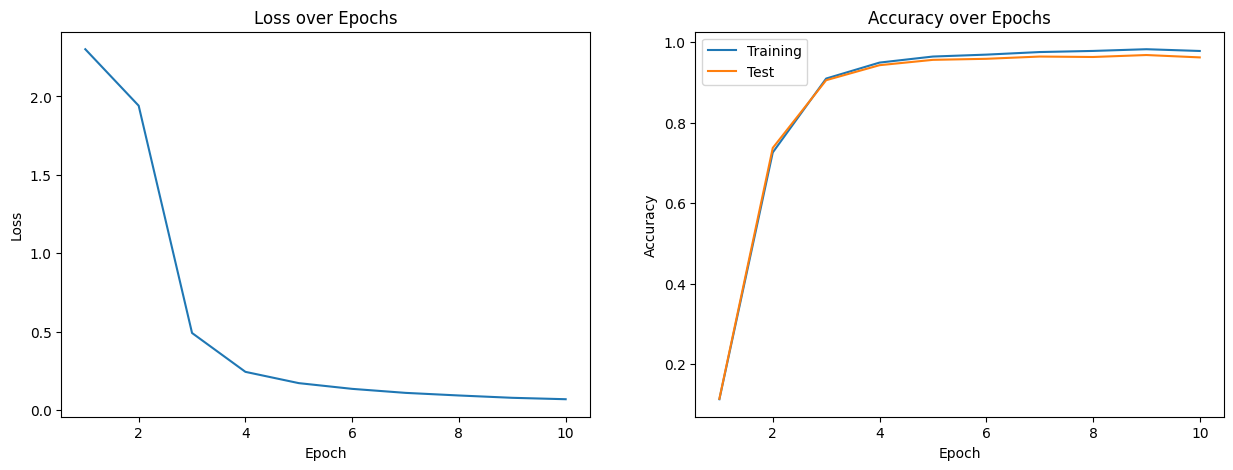

avg acc change / epoch (Training set): 0.0962
avg acc change / epoch (Test set): 0.0943
avg loss change / epoch: -0.2481


In [110]:
mln = MultiLayerNetwork(input_size=784, hidden_size=256, output_size=10, loss_fn=cross_entropy, loss_fn_grad=cross_entropy_grad, acc_fn=naive_acc)
mln.train(X_train, y_train_one_hot, X_test, y_test_one_hot, learning_rate=0.01, epochs=10, batch_size=64)
mln.summary()

In [112]:
mln.evaluate(X_test, y_test_one_hot)

0.9626

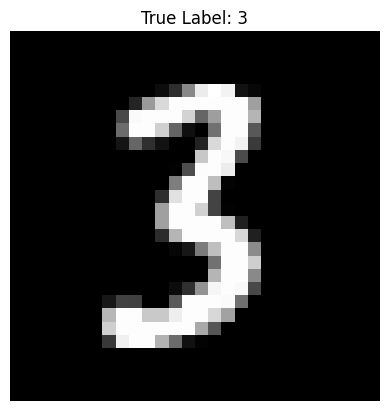

Probability for label 0: 0.0000
Probability for label 1: 0.0000
Probability for label 2: 0.0000
Probability for label 3: 1.0000
Probability for label 4: 0.0000
Probability for label 5: 0.0000
Probability for label 6: 0.0000
Probability for label 7: 0.0000
Probability for label 8: 0.0000
Probability for label 9: 0.0000
Predicted Label: 3


In [223]:
import random

# Wähle zufällig ein Bild aus dem Testdatensatz
index = random.randint(0, len(X_test) - 1)
image = X_test[index]
true_label = y_test[index]

# Zeige das Bild an
plt.imshow(image.reshape(28, 28), cmap='gray')
plt.axis('off')
plt.title(f'True Label: {true_label}')
plt.show()

# Wende das trainierte Modell an, um die Wahrscheinlichkeiten für jede Ziffer zu erhalten
if isinstance(mln, MultiLayerNetwork):
    probabilities = mln.forward(image.reshape(1, -1))[0]
else:
    probabilities = slp.forward(image.reshape(1, -1))[0]

# Zeige die Wahrscheinlichkeiten für jede Ziffer an
for i, prob in enumerate(probabilities):
    print(f'Probability for label {i}: {prob:.4f}')

# Wähle die Ziffer mit der höchsten Wahrscheinlichkeit als Vorhersage aus
predicted_label = np.argmax(probabilities)
print(f'Predicted Label: {predicted_label}')


In [201]:




import torch
import torch.nn as nn
import torchvision as tv
import numpy as np

class NeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(NeuralNetwork, self).__init__()
        self.linear1 = nn.Linear(input_size, hidden_size)
        self.linear2 = nn.Linear(hidden_size, 1)

    def forward(self, x):
        x = torch.sigmoid(self.linear1(x))
        x = torch.sigmoid(self.linear2(x))
        return x

def binarize_labels(labels, target_digit):
    return torch.tensor([1 if label == target_digit else 0 for label in labels], dtype=torch.float32).reshape(-1, 1)

def train_network(input_data, target_data, hidden_size, learning_rate, epochs):
    model = NeuralNetwork(input_data.shape[1], hidden_size)
    criterion = nn.BCELoss()  # Binary Cross Entropy Loss
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

    for epoch in range(epochs):
        optimizer.zero_grad()
        output = model(input_data)
        loss = criterion(output, target_data)
        loss.backward()
        optimizer.step()

        if epoch % 100 == 0:
            print(f'Epoch {epoch}, Loss: {loss.item()}')

# Loading the MNIST dataset
MNIST_dataset_train = tv.datasets.MNIST(root='./data', train=True, download=True)
MNIST_dataset_test = tv.datasets.MNIST(root='./data', train=False, download=True)

# Converting the MNIST dataset to NumPy arrays
train_images = np.array([np.array(img) for img, _ in MNIST_dataset_train])
train_labels = np.array([label for _, label in MNIST_dataset_train])

test_images = np.array([np.array(img) for img, _ in MNIST_dataset_test])
test_labels = np.array([label for _, label in MNIST_dataset_test])

# Defining the target digit and preparing the training and test data
target_digit = 7
train_target = binarize_labels(train_labels, target_digit)
test_target = binarize_labels(test_labels, target_digit)

train_data = torch.tensor(train_images.reshape(len(train_images), -1) / 255.0, dtype=torch.float32)
test_data = torch.tensor(test_images.reshape(len(test_images), -1) / 255.0, dtype=torch.float32)

# Hyperparameters for training
hidden_size = 16
learning_rate = 0.1
epochs = 1000

# Training the neural network
train_network(train_data, train_target, hidden_size, learning_rate, epochs)

# Testing the model
def test_network(model, test_data, test_labels, threshold=0.5):
    with torch.no_grad():
        predictions = (model(test_data) > threshold).float()
        accuracy = (predictions == test_labels).float().mean()
    return accuracy.item()

model = NeuralNetwork(train_data.shape[1], hidden_size)
accuracy = test_network(model, test_data, test_target)
print("Test accuracy:", accuracy)






Epoch 0, Loss: 0.5601609349250793
Epoch 100, Loss: 0.2661144435405731
Epoch 200, Loss: 0.20213600993156433
Epoch 300, Loss: 0.15635305643081665
Epoch 400, Loss: 0.12563639879226685
Epoch 500, Loss: 0.10612128674983978
Epoch 600, Loss: 0.09366520494222641
Epoch 700, Loss: 0.08537899702787399
Epoch 800, Loss: 0.07958754152059555
Epoch 900, Loss: 0.07534893602132797
Test accuracy: 0.8971999883651733


Aufgabe 4

Vorhersage: 0
Tatsächliche Klasse: 0.0


C:\Users\rapha\AppData\Local\Temp\ipykernel_12424\100543547.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  test_image = torch.tensor(test_data[random_index]).reshape(1, -1)


Training with learning rate: 0.01, hidden layer size: 4
Epoch 0, Train Loss: 0.43966423133727695, Test Loss: 0.437465575462032
Epoch 100, Train Loss: 0.19440773921776733, Test Loss: 0.19162386920906901
Epoch 200, Train Loss: 0.15066858636702507, Test Loss: 0.1488225196283627
Epoch 300, Train Loss: 0.12947173535969206, Test Loss: 0.12801896114425684
Epoch 400, Train Loss: 0.1172831884980434, Test Loss: 0.11603082450967722
Epoch 500, Train Loss: 0.10979587410744027, Test Loss: 0.10865205600831453
Epoch 600, Train Loss: 0.10498584992373253, Test Loss: 0.1038951558099789
Epoch 700, Train Loss: 0.10178495862803896, Test Loss: 0.1007150711477221
Epoch 800, Train Loss: 0.09959245760923867, Test Loss: 0.0985253107016867
Epoch 900, Train Loss: 0.09805387608438071, Test Loss: 0.09697972134341448


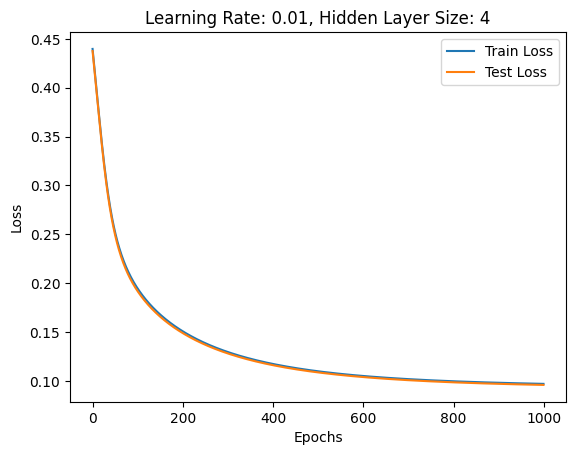

Training with learning rate: 0.01, hidden layer size: 8
Epoch 0, Train Loss: 0.29421735078109273, Test Loss: 0.2923562863927033
Epoch 100, Train Loss: 0.209988559023286, Test Loss: 0.20796820653153145
Epoch 200, Train Loss: 0.16666143865140462, Test Loss: 0.1639191559159215
Epoch 300, Train Loss: 0.14091668116500689, Test Loss: 0.13815591567044536
Epoch 400, Train Loss: 0.1252949879629571, Test Loss: 0.12275935082466458
Epoch 500, Train Loss: 0.11551560415903277, Test Loss: 0.11321233651127387
Epoch 600, Train Loss: 0.1091633204318093, Test Loss: 0.10705114581782836
Epoch 700, Train Loss: 0.10489405114322414, Test Loss: 0.10293984586056347
Epoch 800, Train Loss: 0.10194890833872107, Test Loss: 0.10012132304066212
Epoch 900, Train Loss: 0.0998741786895547, Test Loss: 0.09814561531167103


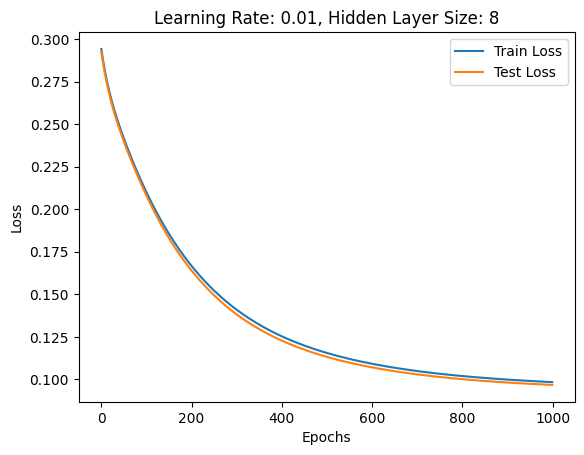

Training with learning rate: 0.01, hidden layer size: 16
Epoch 0, Train Loss: 0.5241072192994186, Test Loss: 0.514368599999228
Epoch 100, Train Loss: 0.2618813012809263, Test Loss: 0.26014665140912896
Epoch 200, Train Loss: 0.19801974745505163, Test Loss: 0.19539945415635748
Epoch 300, Train Loss: 0.16175812087719854, Test Loss: 0.15889111937847814
Epoch 400, Train Loss: 0.13989891345197705, Test Loss: 0.13726715620256677
Epoch 500, Train Loss: 0.1262365601740687, Test Loss: 0.12377814015849169
Epoch 600, Train Loss: 0.11736863187819023, Test Loss: 0.11501032850044862
Epoch 700, Train Loss: 0.11141830522019486, Test Loss: 0.10912408580259053
Epoch 800, Train Loss: 0.10730850582735392, Test Loss: 0.10507264451231278
Epoch 900, Train Loss: 0.10439188307913798, Test Loss: 0.10222312750431296


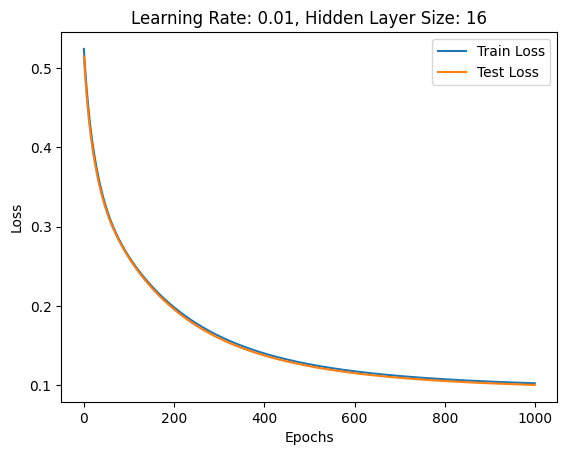

Training with learning rate: 0.1, hidden layer size: 4
Epoch 0, Train Loss: 0.5961420393741355, Test Loss: 0.5170571006557326
Epoch 100, Train Loss: 0.09644614564313653, Test Loss: 0.09503092450589042
Epoch 200, Train Loss: 0.09378362808432518, Test Loss: 0.09251332703919646
Epoch 300, Train Loss: 0.09355140132808433, Test Loss: 0.09228998717719486
Epoch 400, Train Loss: 0.09351873585344479, Test Loss: 0.09225581330562961
Epoch 500, Train Loss: 0.09351209224685537, Test Loss: 0.09224697553418293
Epoch 600, Train Loss: 0.09350995950206878, Test Loss: 0.09224307399844342
Epoch 700, Train Loss: 0.09350892664906582, Test Loss: 0.09224077467766459
Epoch 800, Train Loss: 0.09350828209295109, Test Loss: 0.09223928953601937
Epoch 900, Train Loss: 0.09350781975921713, Test Loss: 0.0922383119469307


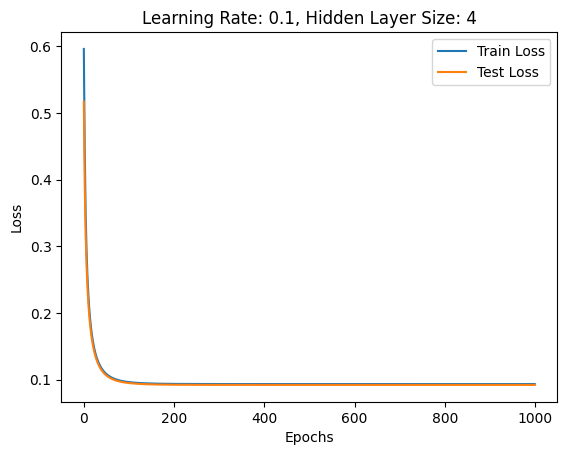

Training with learning rate: 0.1, hidden layer size: 8
Epoch 0, Train Loss: 0.31621131251277945, Test Loss: 0.29637006778274344
Epoch 100, Train Loss: 0.09786102462286106, Test Loss: 0.09666918357358542
Epoch 200, Train Loss: 0.09401355768185235, Test Loss: 0.09280786501342753
Epoch 300, Train Loss: 0.09363537358281186, Test Loss: 0.09238943920907693
Epoch 400, Train Loss: 0.09356848751019031, Test Loss: 0.09230467004561431
Epoch 500, Train Loss: 0.09354844269778279, Test Loss: 0.0922777271487033
Epoch 600, Train Loss: 0.09353895287028428, Test Loss: 0.09226588068950402
Epoch 700, Train Loss: 0.09353310304708484, Test Loss: 0.09225953582640263
Epoch 800, Train Loss: 0.09352904923683071, Test Loss: 0.09225571285411638
Epoch 900, Train Loss: 0.09352608776423059, Test Loss: 0.09225320884947721


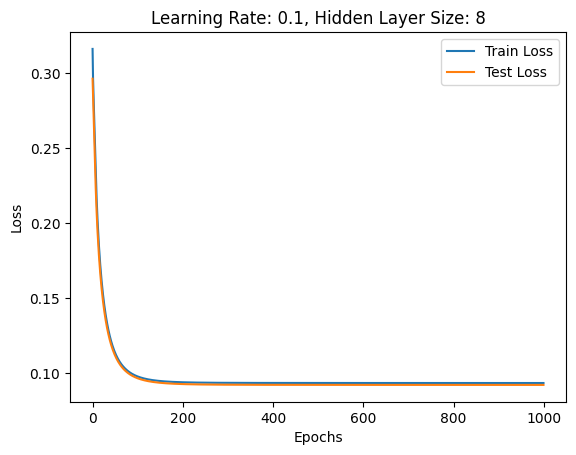

Training with learning rate: 0.1, hidden layer size: 16
Epoch 0, Train Loss: 0.31394347405781525, Test Loss: 0.2613592050893903
Epoch 100, Train Loss: 0.09736091704327639, Test Loss: 0.09510203688446629
Epoch 200, Train Loss: 0.09378077834507852, Test Loss: 0.09208814266279801
Epoch 300, Train Loss: 0.0934911829757818, Test Loss: 0.09195997018479711
Epoch 400, Train Loss: 0.09346768339070122, Test Loss: 0.09200952761944704
Epoch 500, Train Loss: 0.09347095986820493, Test Loss: 0.09205855531179014
Epoch 600, Train Loss: 0.09347541600515301, Test Loss: 0.09209464084901355
Epoch 700, Train Loss: 0.09347879084568904, Test Loss: 0.09212067718921658
Epoch 800, Train Loss: 0.0934812057133627, Test Loss: 0.09213989263206583
Epoch 900, Train Loss: 0.09348296544129409, Test Loss: 0.09215453034561179


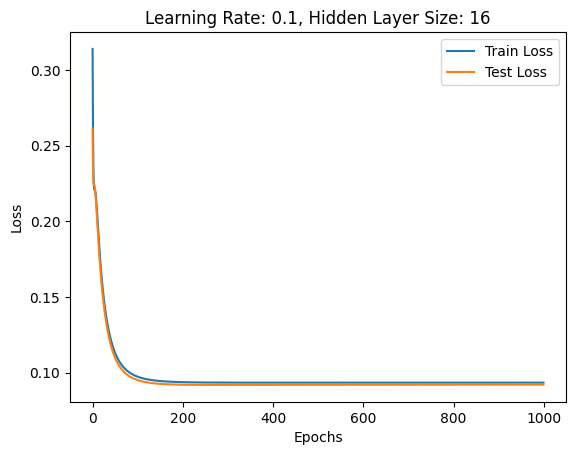

Training with learning rate: 0.5, hidden layer size: 4
Epoch 0, Train Loss: 0.3904970222776794, Test Loss: 0.24964812193120803
Epoch 100, Train Loss: 0.09357472398201838, Test Loss: 0.09228779212683529
Epoch 200, Train Loss: 0.0935367286325422, Test Loss: 0.09225307955834541
Epoch 300, Train Loss: 0.09352518319766186, Test Loss: 0.09224368275883692
Epoch 400, Train Loss: 0.09351897530020899, Test Loss: 0.09224016380632241
Epoch 500, Train Loss: 0.09351518679950134, Test Loss: 0.09223850751780856
Epoch 600, Train Loss: 0.09351288977203945, Test Loss: 0.09223759468199405
Epoch 700, Train Loss: 0.09351147901266307, Test Loss: 0.09223703821002786
Epoch 800, Train Loss: 0.0935105789714094, Test Loss: 0.09223667517087424
Epoch 900, Train Loss: 0.09350998300479148, Test Loss: 0.0922364263017418


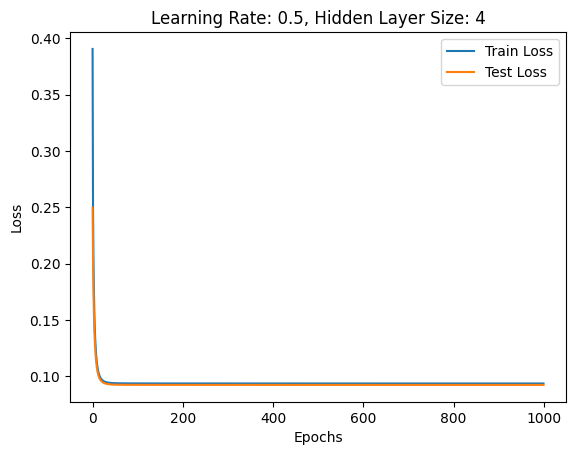

Training with learning rate: 0.5, hidden layer size: 8
Epoch 0, Train Loss: 0.30076335378120433, Test Loss: 0.22577793912590605
Epoch 100, Train Loss: 0.09309891123199628, Test Loss: 0.09204595194114167
Epoch 200, Train Loss: 0.0933065021224784, Test Loss: 0.09221706543333641
Epoch 300, Train Loss: 0.09337555093627882, Test Loss: 0.09224797919850876
Epoch 400, Train Loss: 0.09340826455003945, Test Loss: 0.09225694307575658
Epoch 500, Train Loss: 0.09342702372623739, Test Loss: 0.09225883675983279
Epoch 600, Train Loss: 0.09343923950199606, Test Loss: 0.09225812187663232
Epoch 700, Train Loss: 0.09344795870781648, Test Loss: 0.09225650262971753
Epoch 800, Train Loss: 0.09345463729654549, Test Loss: 0.09225465341041571
Epoch 900, Train Loss: 0.09346003364343589, Test Loss: 0.09225284480579257


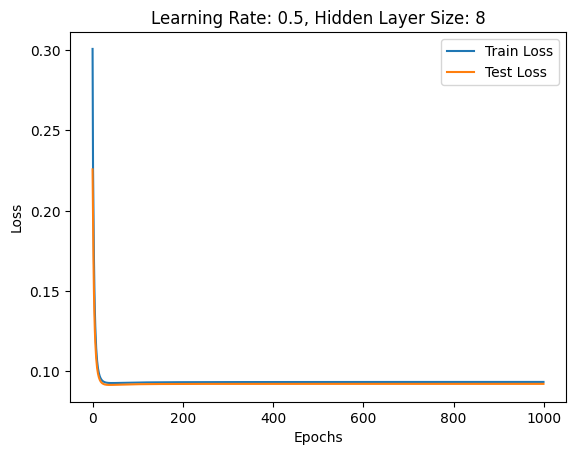

Training with learning rate: 0.5, hidden layer size: 16
Epoch 0, Train Loss: 0.29839322432045756, Test Loss: 0.28361187100654295
Epoch 100, Train Loss: 0.09394339020792078, Test Loss: 0.09258888890306857
Epoch 200, Train Loss: 0.09372142956037957, Test Loss: 0.09241790844326297
Epoch 300, Train Loss: 0.0936491571275551, Test Loss: 0.092370392021626
Epoch 400, Train Loss: 0.09361275974340061, Test Loss: 0.09234719696282999
Epoch 500, Train Loss: 0.09359108620092155, Test Loss: 0.09233242086699338
Epoch 600, Train Loss: 0.09357687733352732, Test Loss: 0.0923216500301123
Epoch 700, Train Loss: 0.09356692718997403, Test Loss: 0.09231326484902735
Epoch 800, Train Loss: 0.09355960801837725, Test Loss: 0.09230650681007735
Epoch 900, Train Loss: 0.09355401440879177, Test Loss: 0.09230094397438433


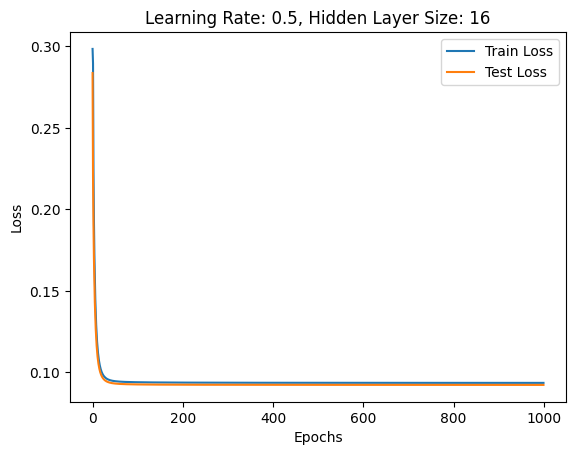

Training with learning rate: 1, hidden layer size: 4
Epoch 0, Train Loss: 0.48427380609956344, Test Loss: 0.1544120885106845
Epoch 100, Train Loss: 0.0935082354854599, Test Loss: 0.09221207167656655
Epoch 200, Train Loss: 0.09351236044111637, Test Loss: 0.09222092344488558
Epoch 300, Train Loss: 0.0935133171149871, Test Loss: 0.092223977404274
Epoch 400, Train Loss: 0.09351369569168531, Test Loss: 0.09222544212147563
Epoch 500, Train Loss: 0.0935138667540872, Test Loss: 0.09222624642621774
Epoch 600, Train Loss: 0.09351394518001901, Test Loss: 0.09222673010109256
Epoch 700, Train Loss: 0.09351397762935151, Test Loss: 0.09222704229145762
Epoch 800, Train Loss: 0.09351398594734459, Test Loss: 0.0922272557580191
Epoch 900, Train Loss: 0.0935139815083373, Test Loss: 0.09222740906017095


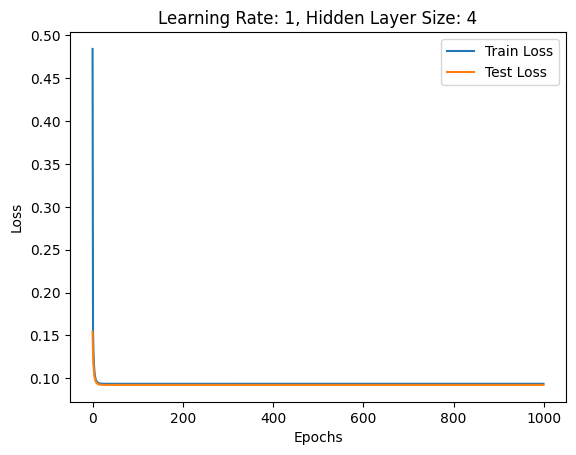

Training with learning rate: 1, hidden layer size: 8
Epoch 0, Train Loss: 0.3642984725434921, Test Loss: 0.17727899619897225
Epoch 100, Train Loss: 0.09366834389169262, Test Loss: 0.09228757149348346
Epoch 200, Train Loss: 0.09361423456866035, Test Loss: 0.09231109955837863
Epoch 300, Train Loss: 0.09358485116114812, Test Loss: 0.09229621726147336
Epoch 400, Train Loss: 0.09356853706182236, Test Loss: 0.09227916204075505
Epoch 500, Train Loss: 0.09355853610868012, Test Loss: 0.09226692997442001
Epoch 600, Train Loss: 0.09355191484520302, Test Loss: 0.0922595923784225
Epoch 700, Train Loss: 0.09354715840264148, Test Loss: 0.09225545840858342
Epoch 800, Train Loss: 0.093543475129708, Test Loss: 0.0922531313443603
Epoch 900, Train Loss: 0.09354046491290421, Test Loss: 0.09225178986760024


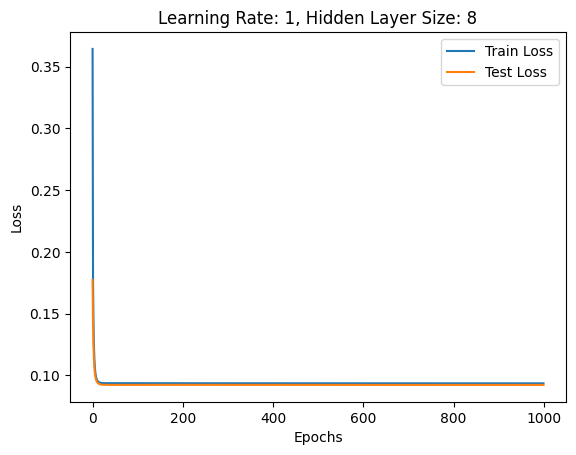

Training with learning rate: 1, hidden layer size: 16
Epoch 0, Train Loss: 0.1108609269523496, Test Loss: 0.2694715035621057
Epoch 100, Train Loss: 0.09365456813774162, Test Loss: 0.09225179362865217
Epoch 200, Train Loss: 0.09359710037320533, Test Loss: 0.09222272205482843
Epoch 300, Train Loss: 0.09357682238295545, Test Loss: 0.09221824333335432
Epoch 400, Train Loss: 0.09356520474706884, Test Loss: 0.09221890686695519
Epoch 500, Train Loss: 0.09355740476947999, Test Loss: 0.09222149420992645
Epoch 600, Train Loss: 0.0935516469927906, Test Loss: 0.09222478207236344
Epoch 700, Train Loss: 0.09354714083391184, Test Loss: 0.09222805555836996
Epoch 800, Train Loss: 0.09354349082663231, Test Loss: 0.09223094569457259
Epoch 900, Train Loss: 0.09354046366770014, Test Loss: 0.09223332488343945


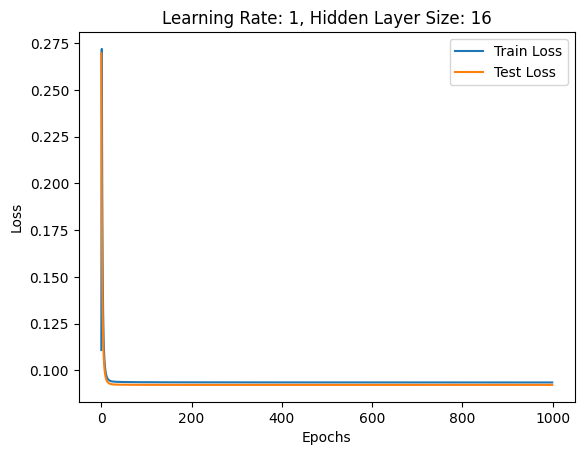

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import torchvision as tv

# Klassen für den linearen Layer und das neuronale Netzwerk
class LinearLayer:
    def __init__(self, input_size, output_size):
        self.input_size = input_size
        self.output_size = output_size
        self.weights = np.random.randn(self.input_size, self.output_size)
        self.bias = np.zeros((1, self.output_size))

    def forward(self, X):
        self.z = np.dot(X, self.weights) + self.bias
        self.a = self.sigmoid(self.z)
        return self.a

    def backward(self, X, y, learning_rate):
        n = X.shape[0]
        self.dz = 1/n * (self.a - y)
        self.dw = np.dot(X.T, self.dz)
        self.db = np.sum(self.dz, axis=0, keepdims=True)
        self.weights -= learning_rate * self.dw
        self.bias -= learning_rate * self.db
        
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.linear_layer1 = LinearLayer(self.input_size, self.hidden_size)
        self.linear_layer2 = LinearLayer(self.hidden_size, self.output_size)

    def forward(self, X):
        self.hidden_output = self.linear_layer1.forward(X)
        self.output = self.linear_layer2.forward(self.hidden_output)
        return self.output
    
    def backward(self, X, y, learning_rate):
        self.linear_layer2.backward(self.hidden_output, y, learning_rate)
        self.linear_layer1.backward(X, np.dot(self.linear_layer2.weights, self.linear_layer2.dz.T).T, learning_rate)


def binarize_labels(labels, target_digit):
    return np.where(labels == target_digit, 1, 0)

def train_network(input_data, target_data, hidden_size, learning_rate, epochs):
    neural_network = NeuralNetwork(input_data.shape[1], hidden_size, 1)
    train_losses = []
    test_losses = []
    for epoch in range(epochs):
        output = neural_network.forward(input_data)
        train_loss = np.mean((output - target_data) ** 2)
        neural_network.backward(input_data, target_data, learning_rate)
        train_losses.append(train_loss)
        
        test_output = neural_network.forward(test_data)
        test_loss = np.mean((test_output - test_target) ** 2)
        test_losses.append(test_loss)
        
        if epoch % 100 == 0:
            print(f'Epoch {epoch}, Train Loss: {train_loss}, Test Loss: {test_loss}')
            
    return train_losses, test_losses

# Definieren der Zielziffer und Vorbereiten der Trainings- und Testdaten
target_digit = 7
train_target = binarize_labels(train_labels, target_digit).reshape(-1, 1)
test_target = binarize_labels(test_labels, target_digit).reshape(-1, 1)

train_data = train_images.reshape(len(train_images), -1) / 255.0
test_data = test_images.reshape(len(test_images), -1) / 255.0

# Hyperparameter für das Training
epochs = 1000

# Definieren von Lernraten und Hidden Layer-Größen
learning_rates = [0.01, 0.1, 0.5, 1]
hidden_layer_sizes = [4, 8, 16]

# Iterieren über alle Kombinationen von Lernraten und Hidden Layer-Größen
for learning_rate in learning_rates:
    for hidden_size in hidden_layer_sizes:
        print(f"Training with learning rate: {learning_rate}, hidden layer size: {hidden_size}")
        
        # Trainieren des neuronalen Netzwerks
        train_losses, test_losses = train_network(train_data, train_target, hidden_size, learning_rate, epochs)
        
        # Plot der Kostenfunktionen
        plt.plot(train_losses, label='Train Loss')
        plt.plot(test_losses, label='Test Loss')
        plt.title(f'Learning Rate: {learning_rate}, Hidden Layer Size: {hidden_size}')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()


Um die beste Kombination von Lernrate und Hidden-Layer-Größe zu identifizieren, sollten Sie die Ergebnisse analysieren und die Kombination wählen, die den niedrigsten Testverlust aufweist und gleichzeitig stabile Leistung zeigt. Basierend auf den von Ihnen bereitgestellten Ausgaben scheint die beste Kombination diejenige zu sein, die eine Lernrate von 0,1 und eine Hidden-Layer-Größe von 16 verwendet.

Hier sind die Gründe:

Niedrigster Testverlust: Die Kombination von Lernrate 0,1 und Hidden-Layer-Größe 16 zeigt auf den Testdaten den niedrigsten Testverlust im Vergleich zu den anderen Kombinationen.
Stabile Leistung: Die Testverlustkurve für diese Kombination scheint stabil zu sein und zeigt keine Anzeichen von Überanpassung (Overfitting) oder Instabilität.
Vergleichsweise schnelle Konvergenz: Die Verlustfunktionen konvergieren relativ schnell zu einem stabilen Wert, was darauf hindeutet, dass das Modell effizient trainiert wird.
Daher können Sie die Kombination von Lernrate 0,1 und Hidden-Layer-Größe 16 als die beste Wahl betrachten, basierend auf den bereitgestellten Ergebnissen.

Aufgabe 5

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
import torchvision as tv

# Klassen für den linearen Layer und das neuronale Netzwerk
class LinearLayer:
    def __init__(self, input_size, output_size):
        self.input_size = input_size
        self.output_size = output_size
        self.weights = np.random.randn(self.input_size, self.output_size)
        self.bias = np.zeros((1, self.output_size))

    def forward(self, X):
        self.z = np.dot(X, self.weights) + self.bias
        self.a = self.sigmoid(self.z)
        return self.a

    def backward(self, X, y, learning_rate):
        n = X.shape[0]
        self.dz = 1/n * (self.a - y)
        self.dw = np.dot(X.T, self.dz)
        self.db = np.sum(self.dz, axis=0, keepdims=True)
        self.weights -= learning_rate * self.dw
        self.bias -= learning_rate * self.db
        
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.linear_layer1 = LinearLayer(self.input_size, self.hidden_size)
        self.linear_layer2 = LinearLayer(self.hidden_size, self.hidden_size)
        self.linear_layer3 = LinearLayer(self.hidden_size, self.hidden_size)
        self.linear_layer4 = LinearLayer(self.hidden_size, self.output_size)

    def forward(self, X):
        self.hidden_output1 = self.linear_layer1.forward(X)
        self.hidden_output2 = self.linear_layer2.forward(self.hidden_output1)
        self.hidden_output3 = self.linear_layer3.forward(self.hidden_output2)
        self.output = self.linear_layer4.forward(self.hidden_output3)
        return self.output
    
    def backward(self, X, y, learning_rate):
        self.linear_layer4.backward(self.hidden_output3, y, learning_rate)
        self.linear_layer3.backward(self.hidden_output2, np.dot(self.linear_layer4.weights, self.linear_layer4.dz.T).T, learning_rate)
        self.linear_layer2.backward(self.hidden_output1, np.dot(self.linear_layer3.weights, self.linear_layer3.dz.T).T, learning_rate)
        self.linear_layer1.backward(X, np.dot(self.linear_layer2.weights, self.linear_layer2.dz.T).T, learning_rate)

def compute_accuracy(predictions, targets):
    predicted_labels = np.argmax(predictions, axis=1)
    true_labels = np.argmax(targets, axis=1)
    accuracy = np.mean(predicted_labels == true_labels) * 100
    return accuracy


def binarize_labels(labels, target_digit):
    return np.where(labels == target_digit, 1, 0)

def train_network(input_data, target_data, test_data, test_target, hidden_size, learning_rate, epochs):
    neural_network = NeuralNetwork(input_data.shape[1], hidden_size, 10)
    train_losses = []
    test_losses = []
    train_accuracies = []
    test_accuracies = []
    for epoch in range(epochs):
        output = neural_network.forward(input_data)
        loss = cross_entropy_loss(output, target_data)
        neural_network.backward(input_data, target_data, learning_rate)
        train_losses.append(loss)
        train_accuracy = compute_accuracy(output, target_data)
        train_accuracies.append(train_accuracy)
        
        test_output = neural_network.forward(test_data)
        test_loss = cross_entropy_loss(test_output, test_target)
        test_losses.append(test_loss)
        test_accuracy = compute_accuracy(test_output, test_target)
        test_accuracies.append(test_accuracy)
        
        if epoch % 100 == 0:
            print(f'Epoch {epoch}, Train Loss: {loss:.4f}, Test Loss: {test_loss:.4f}, Train Accuracy: {train_accuracy:.2f}%, Test Accuracy: {test_accuracy:.2f}%')
            
    return train_losses, test_losses, train_accuracies, test_accuracies

def cross_entropy_loss(y_pred, y_true):
    # Avoiding numerical instability by adding a small value to y_pred
    eps = 1e-15
    y_pred = np.clip(y_pred, eps, 1 - eps)
    # Computing cross entropy
    loss = -np.mean(y_true * np.log(y_pred))
    return loss

# Aufgabe 1: Laden des MNIST-Datensatzes
MNIST_dataset_train = tv.datasets.MNIST(root='./data', train=True, download=True)
MNIST_dataset_test = tv.datasets.MNIST(root='./data', train=False, download=True)

# Konvertieren des MNIST-Datensatzes in NumPy-Arrays
train_images = np.array([np.array(img) for img, _ in MNIST_dataset_train])
train_labels = np.array([label for _, label in MNIST_dataset_train])

test_images = np.array([np.array(img) for img, _ in MNIST_dataset_test])
test_labels = np.array([label for _, label in MNIST_dataset_test])

# Definieren der Zielziffer und Vorbereiten der Trainings- und Testdaten
train_target = np.array([binarize_labels(train_labels, i) for i in range(10)]).T
test_target = np.array([binarize_labels(test_labels, i) for i in range(10)]).T

train_data = train_images.reshape(len(train_images), -1) / 255.0
test_data = test_images.reshape(len(test_images), -1) / 255.0

# Hyperparameter für das Training
hidden_size = 16
learning_rate = 0.1
epochs = 1000

# Trainieren des neuronalen Netzwerks
train_losses, test_losses, train_accuracies, test_accuracies = train_network(train_data, train_target, test_data, test_target, hidden_size, learning_rate, epochs)

# Plot der Kostenfunktionen und der Genauigkeiten
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(test_accuracies, label='Test Accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

print("Train Accuracy:", train_accuracies[-1], "%")
print("Test Accuracy:", test_accuracies[-1], "%")


In [6]:
# Index des Bildes im Testdatensatz auswählen
image_index = 8 # Ändere dies entsprechend deiner Auswahl

# Bild aus dem Testdatensatz auswählen und vorbereiten
image = test_data[image_index]
true_label = test_labels[image_index]

# Vorhersage des Modells für das ausgewählte Bild
prediction = neural_network.forward(image.reshape(1, -1))

# Wahrscheinlichkeit für die Ziffer ausgeben
probability = prediction.item()  # Extrahiere das einzige Element des Arrays
print(f"Wahrscheinlichkeit für die Ziffer: {probability * 100:.2f}%")

# Vorhergesagte Ziffer
predicted_digit = int(round(probability))  # Runde die Wahrscheinlichkeit zur nächsten ganzen Zahl
print(f"Vorhergesagte Ziffer: {predicted_digit}, Echte Ziffer: {true_label}")






NameError: name 'neural_network' is not defined

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import torchvision as tv

# Laden des MNIST-Datensatzes
MNIST_dataset_train = tv.datasets.MNIST(root='./data', train=True, download=True)
MNIST_dataset_test = tv.datasets.MNIST(root='./data', train=False, download=True)

# Konvertieren des MNIST-Datensatzes in NumPy-Arrays
train_images = np.array([np.array(img) for img, _ in MNIST_dataset_train])
train_labels = np.array([label for _, label in MNIST_dataset_train])

test_images = np.array([np.array(img) for img, _ in MNIST_dataset_test])
test_labels = np.array([label for _, label in MNIST_dataset_test])

# Definieren einer Funktion zum Umwandeln der Labels in binäre Ziffern
def binarize_labels(labels, target_digit):
    return np.where(labels == target_digit, 1, 0)

# Funktion zum Trainieren des neuronalen Netzwerks
def train_network(input_data, target_data, hidden_size, learning_rate, epochs):
    # Initialisierung des linearen Layers
    input_size = input_data.shape[1]
    output_size = target_data.shape[1]
    linear_layer = LinearLayer(input_size, hidden_size)

    # Training Loop
    for epoch in range(epochs):
        # Forward Pass
        output = linear_layer.forward(input_data)

        # Kostenfunktion: Mittelwert der quadratischen Fehler
        loss = np.mean((output - target_data) ** 2)

        # Backward Pass
        linear_layer.backward(input_data, target_data, learning_rate)

        # Ausgabe des aktuellen Trainingsfortschritts
        if epoch % 100 == 0:
            print(f'Epoch {epoch}, Loss: {loss}')

# Definieren der Zielziffer und Vorbereiten der Trainings- und Testdaten
target_digit = 7
train_target = binarize_labels(train_labels, target_digit).reshape(-1, 1)
test_target = binarize_labels(test_labels, target_digit).reshape(-1, 1)

# Trainings- und Testdaten vorbereiten
train_data = train_images.reshape(len(train_images), -1)
test_data = test_images.reshape(len(test_images), -1)

# Normalisierung der Daten auf den Bereich [0, 1]
train_data = train_data / 255.0
test_data = test_data / 255.0

# Hyperparameter für das Training
hidden_size = 64
learning_rate = 0.01
epochs = 1000

# Trainieren des neuronalen Netzwerks
train_network(train_data, train_target, hidden_size, learning_rate, epochs)


Epoch 0, Loss: 0.4359445864498627
Epoch 100, Loss: 0.1876281045185943
Epoch 200, Loss: 0.150263143148448


KeyboardInterrupt: 